In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [306]:
add='C:\\Users\\Prashant\\Desktop\\Data science practice\\loan_data_set.csv'
bal_data=pd.read_csv(add)
bal_data.columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

In [307]:
bal_data[:10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [308]:
#to check no of rows and columns
print('dataset lenght::',len(bal_data))
print('dataset shape::'), bal_data.shape

dataset lenght:: 614
dataset shape::


(None, (614, 13))

In [309]:
bal_data.groupby(['Dependents','Married'])['Married'].size()

Dependents  Married
0.0         No         171
            Yes        174
1.0         No          23
            Yes         79
2.0         No           8
            Yes         93
3.0         No           7
            Yes         44
Name: Married, dtype: int64

In [310]:
bal_data.groupby(['Property_Area']).size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [311]:
bal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [312]:
del bal_data['Loan_ID']
del bal_data['Gender']

In [313]:
bal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    float64
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 52.9+ KB


In [314]:
#dropping null values and resseting the index
bal_data.dropna(inplace=True)
bal_data.reset_index(inplace=True, drop=True)

In [315]:
bal_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            492 non-null    object 
 1   Dependents         492 non-null    float64
 2   Education          492 non-null    object 
 3   Self_Employed      492 non-null    object 
 4   ApplicantIncome    492 non-null    int64  
 5   CoapplicantIncome  492 non-null    float64
 6   LoanAmount         492 non-null    float64
 7   Loan_Amount_Term   492 non-null    float64
 8   Credit_History     492 non-null    float64
 9   Property_Area      492 non-null    object 
 10  Loan_Status        492 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 42.4+ KB


In [316]:
bal_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [317]:
#encoding data
label_encode=LabelEncoder()
maritial_st=bal_data['Married']
Married_encoded=label_encode.fit_transform(maritial_st)
Married_encoded[0:5]
Married_df=pd.DataFrame(Married_encoded,columns=['Maritial_status'])#married=1 and unmarried=0
Married_df.head()

,Maritial_status
0,1
1,1
2,1
3,0
4,1


In [318]:
grad=bal_data['Education']
grad_encoded=label_encode.fit_transform(grad)
grad_df=pd.DataFrame(grad_encoded,columns=['Not_Graduate'])#0=graduate and 1=not graduate
grad_df.head()

,Not_Graduate
0,0
1,0
2,1
3,0
4,0


In [319]:
self_em=bal_data['Self_Employed']
self_encoded=label_encode.fit_transform(self_em)
self_encoded[0:5]#self employed=1 and salaried=0
self_em_df=pd.DataFrame(self_encoded,columns=['Self_employed'])
self_em_df.head()

,Self_employed
0,0
1,1
2,0
3,0
4,1


In [320]:
#one hot encoding
hot_en_area=pd.get_dummies(bal_data.Property_Area, prefix='ar')
hot_en_area[0:5]

,ar_Rural,ar_Semiurban,ar_Urban
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [321]:
#deleting columns and adding new processed columns to data
bal_data.drop(['Married','Education','Self_Employed','Property_Area'],axis=1, inplace=True)


In [322]:
bal_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,4583,1508.0,128.0,360.0,1.0,N
1,0.0,3000,0.0,66.0,360.0,1.0,Y
2,0.0,2583,2358.0,120.0,360.0,1.0,Y
3,0.0,6000,0.0,141.0,360.0,1.0,Y
4,2.0,5417,4196.0,267.0,360.0,1.0,Y


In [323]:
#adding new processed columns
bal_data=pd.concat([bal_data,Married_df,grad_df,self_em_df,hot_en_area],axis=1,verify_integrity=True)
bal_data.head()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Maritial_status,Not_Graduate,Self_employed,ar_Rural,ar_Semiurban,ar_Urban
0,1.0,4583,1508.0,128.0,360.0,1.0,N,1,0,0,1,0,0
1,0.0,3000,0.0,66.0,360.0,1.0,Y,1,0,1,0,0,1
2,0.0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,0,0,1
3,0.0,6000,0.0,141.0,360.0,1.0,Y,0,0,0,0,0,1
4,2.0,5417,4196.0,267.0,360.0,1.0,Y,1,0,1,0,0,1


In [324]:
x_train,x_test,y_train,y_test=train_test_split(bal_data.drop(['Loan_Status'],axis=1),bal_data['Loan_Status'],test_size=0.2,random_state=400)

In [328]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=17,random_state=400)
clf_entropy.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=400, splitter='best')

In [329]:
y_pred=clf_entropy.predict(x_test)
y_pred

array(['N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y'], dtype=object)

In [327]:
#checking the efficiency of model
print('accuracy score of model:',accuracy_score(y_test,y_pred))

accuracy score of model: 0.7474747474747475


[Text(604.7193396226415, 1055.2235294117647, 'X[5] <= 0.5\nentropy = 0.902\nsamples = 393\nvalue = [125, 268]'),
 Text(426.39622641509436, 991.2705882352941, 'X[3] <= 547.5\nentropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(405.33962264150944, 927.3176470588236, 'X[1] <= 5392.5\nentropy = 0.464\nsamples = 61\nvalue = [55, 6]'),
 Text(384.28301886792457, 863.364705882353, 'X[1] <= 4249.5\nentropy = 0.575\nsamples = 44\nvalue = [38, 6]'),
 Text(342.1698113207547, 799.4117647058824, 'X[2] <= 6623.0\nentropy = 0.292\nsamples = 39\nvalue = [37, 2]'),
 Text(321.11320754716985, 735.4588235294118, 'X[3] <= 91.5\nentropy = 0.176\nsamples = 38\nvalue = [37, 1]'),
 Text(300.0566037735849, 671.5058823529412, 'X[2] <= 2065.0\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(279.0, 607.5529411764707, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(321.11320754716985, 607.5529411764707, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(342.1698113207547, 671.5058823529412, 'entropy

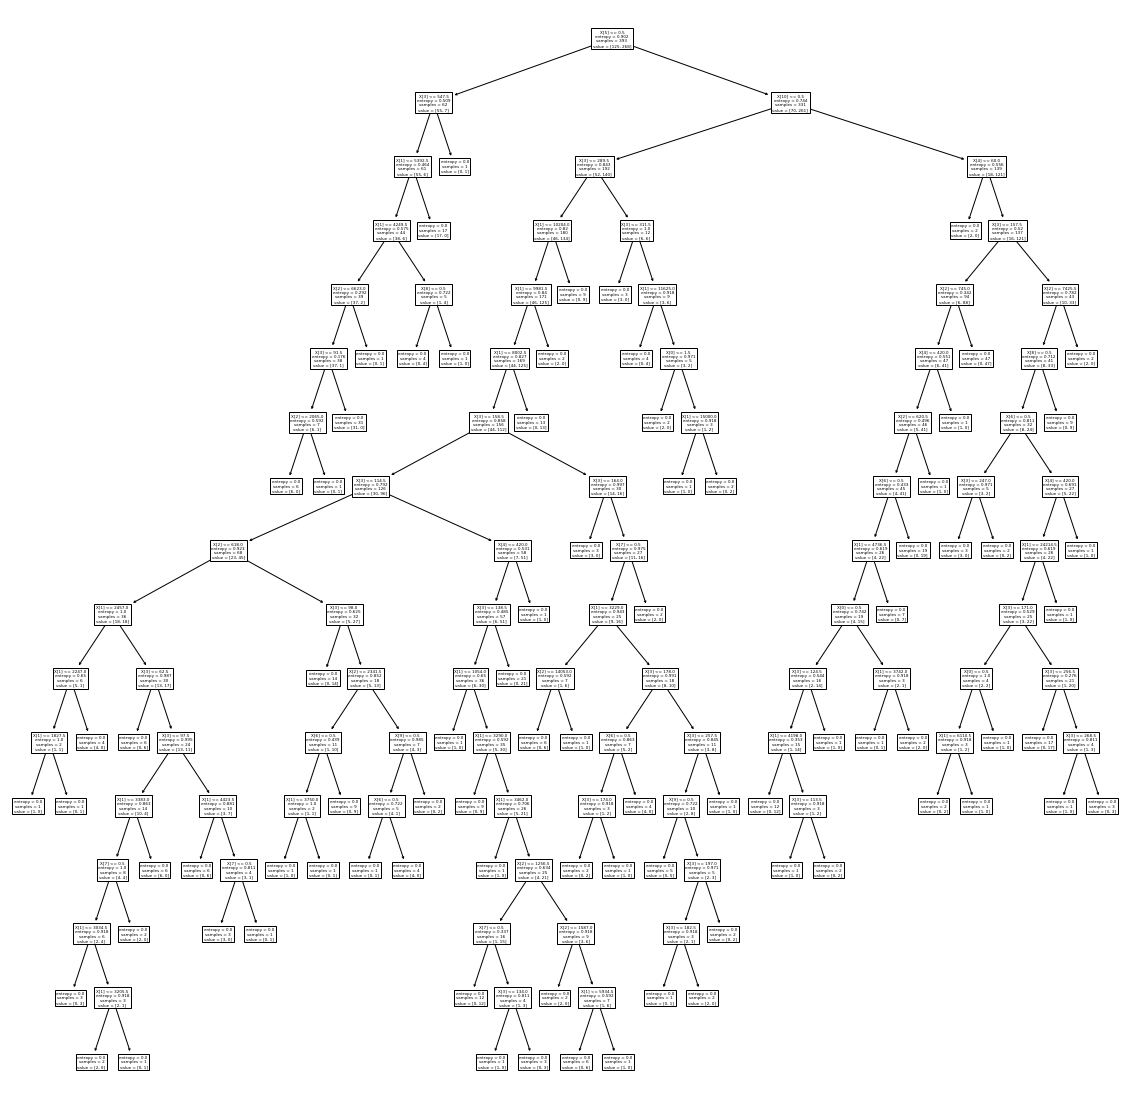

In [334]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf_entropy)